Bağımlı İki Örneklem T Testi

Bağımlı İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

Normallik Varsayımı
Varyanslık Homojenliği

In [1]:
import pandas as pd
import numpy as np

oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
                      121,118,124,121,125,115,115,119,118,121,117,117,120,120,
                      121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
                       134,134,124,140,134,129,129,138,134,124,122,126,133,127,
                       130,130,130,132,117,130,125,129,133,120,127,123])

In [2]:
oncesi[:10]

,0
0,123
1,119
2,119
3,116
4,123
5,123
6,121
7,120
8,117
9,118


In [3]:
sonrasi[:8]

,0
0,118
1,127
2,122
3,132
4,129
5,123
6,129
7,132


In [4]:
#1.Veri Seti
AYRIK = pd.concat([oncesi,sonrasi],axis = 1)
AYRIK.columns = ["Oncesi","Sonrasi"]
print("'AYRIK' Veri Seti : \n\n ",AYRIK.head(),"\n\n")

#2.Veri Seti
#ONCESI Flag/TAG'ını oluşturma 
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#Flag ve ONCESI değelerini bir araya getirme
A = pd.concat([oncesi,GRUP_ONCESI],axis = 1)
#SONRASI flag tagini oluşturma
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"
#Flag ve SONRASII değelerini bir araya getirme
B = pd.concat([sonrasi,GRUP_SONRASI],axis = 1)
#Tüm veriyi bir araya getirme
BIRLIKTE = pd.concat([A,B])
BIRLIKTE
#İSİMLENDİRME
BIRLIKTE.columns = ["Performans","Oncesi_Sonrasi"]
print("'BIRLIKTE' Veri Seti :\n\n",BIRLIKTE.head(),"\n")


'AYRIK' Veri Seti : 

     Oncesi  Sonrasi
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti :

    Performans Oncesi_Sonrasi
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



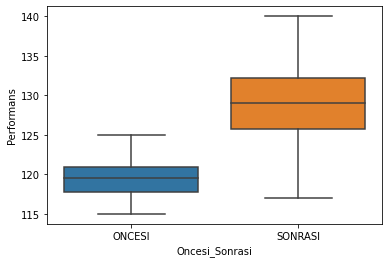

In [5]:
import seaborn as sns
sns.boxplot(x = "Oncesi_Sonrasi",y = "Performans",data = BIRLIKTE);

Varsayım Kontrolleri

In [6]:
from scipy.stats import shapiro
import scipy.stats as stats

In [7]:
shapiro(AYRIK.Oncesi)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

Normalliğe ilişkin HO Hipotezi : Örnek dağılım ile teorik normal dağılımı arasında istatiki anlamlı bir fark yoktur.

In [8]:
shapiro(AYRIK.Sonrasi)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

In [9]:
stats.levene(AYRIK.Oncesi,AYRIK.Sonrasi)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

HO : Varyanslar homojendir.Kontol ettiğimizde pvalue < alfa HO yanlış varyanslar homojen değildir.Bağımlı İki Örneklem T Testinde varyans homojenliği
incelendiğinde burada bu varsayımın sağlanmaması durumunda bir miktar göz ardı edilebilen bir durumdur.Bu varyans sağlanmışçasına devam edeceğiz.

Hipotez Testi

In [10]:
stats.ttest_rel(AYRIK.Oncesi,AYRIK.Sonrasi)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

pvalue < alfa H0 reddedilir.Eğitim sonrası çalışanların performanası eğitim öncesi performanslarından yüksektir.